In [98]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

# Data Understanding


In [99]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours_Studied,6607.0,19.975329,5.990594,1.0,16.0,20.0,24.0,44.0
Attendance,6607.0,79.977448,11.547475,60.0,70.0,80.0,90.0,100.0
Sleep_Hours,6607.0,7.029060,1.468120,4.0,6.0,7.0,8.0,10.0
Previous_Scores,6607.0,75.070531,14.399784,50.0,63.0,75.0,88.0,100.0
Tutoring_Sessions,6607.0,1.493719,1.230570,0.0,1.0,1.0,2.0,8.0
Physical_Activity,6607.0,2.967610,1.031231,0.0,2.0,3.0,4.0,6.0
Exam_Score,6607.0,67.235659,3.890456,55.0,65.0,67.0,69.0,101.0


In [102]:
df.shape

(6607, 20)

# Check for Dtypes

In [103]:
dtypes = df.dtypes
numUniq = df.nunique()
pd.DataFrame({'Data Type': dtypes, 'Num_Of_Uniques': numUniq}).T

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Data Type,int64,int64,object,object,object,int64,int64,object,object,int64,object,object,object,object,int64,object,object,object,object,int64
Num_Of_Uniques,41,41,3,3,2,7,51,3,2,9,3,3,2,3,7,2,3,3,2,45


In [104]:
cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level', 'Internet_Access','Tutoring_Sessions','Family_Income','Teacher_Quality','School_Type','Peer_Influence','Physical_Activity','Learning_Disabilities','Parental_Education_Level','Gender','Distance_from_Home']
df[cols] = df[cols].astype('category')
dtypes = df.dtypes
numUniq = df.nunique()
pd.DataFrame({'Dtypes': dtypes, 'NumOfUniques': numUniq}).T

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
Dtypes,int64,int64,category,category,category,category,int64,category,category,category,category,category,category,category,category,category,category,category,category,int64
NumOfUniques,41,41,3,3,2,7,51,3,2,9,3,3,2,3,7,2,3,3,2,45


# Handle Missing Values


In [105]:
nulls = df.isnull().sum()
ratio  = 100*nulls/df.shape[0]
pd.DataFrame({'nullSum': nulls, 'ratio': ratio}).T

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
nullSum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.000000,0.0,0.0,0.0,0.0,90.000000,67.000000,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.180566,0.0,0.0,0.0,0.0,1.362192,1.014076,0.0,0.0


In [106]:
df.dropna(subset=['Teacher_Quality'], inplace=True)
df.dropna(subset=['Parental_Education_Level'], inplace=True)
df.dropna(subset=['Distance_from_Home'], inplace=True)
nulls = df.isnull().sum()
ratio  = 100*nulls/df.shape[0]
pd.DataFrame({'nullSum': nulls, 'ratio': ratio}).T

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
nullSum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   category
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   category
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

# Handle Outliers

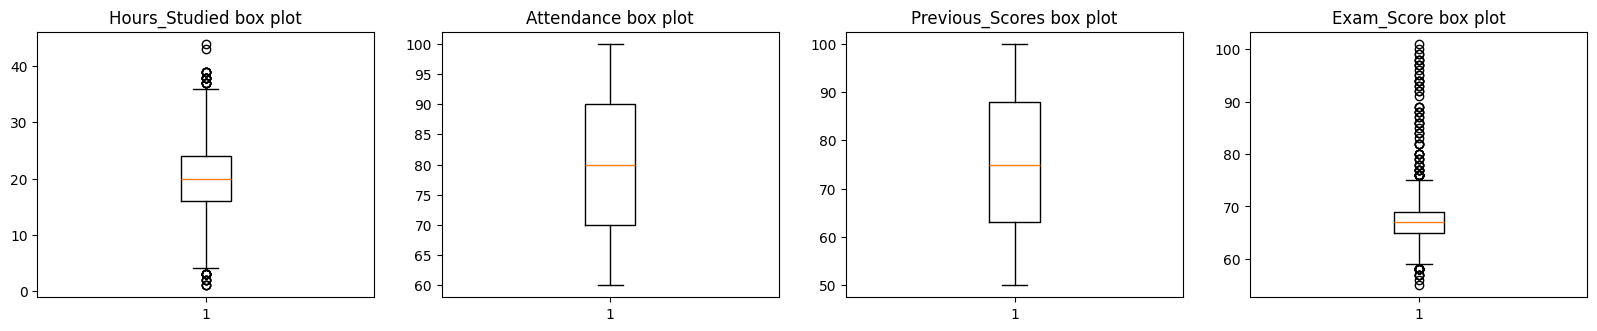

In [108]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i, col in enumerate(Numeric_columns):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col} box plot")
plt.show()


In [109]:

for col in Numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fennse = Q3 + (1.5*IQR)
    lower_fennse = Q1 - (1.5*IQR)
    Low_Outlier = df[df[col] < lower_fennse][col].values
    Up_Outlier = df[df[col] > Upper_Fennse][col].values
    df[col].replace(Low_Outlier , lower_fennse , inplace=True)
    df[col].replace(Up_Outlier , Upper_Fennse , inplace=True)


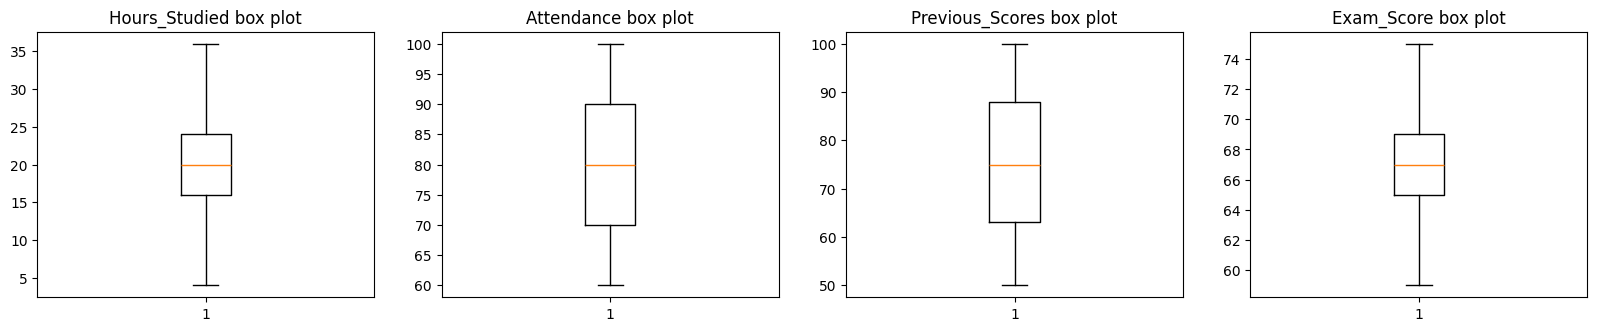

In [110]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i, col in enumerate(Numeric_columns):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col} box plot")
plt.show()


# Visualizations
* A. Data Distribution Graphs
>> Numerical Data Distribution

1. Histogram

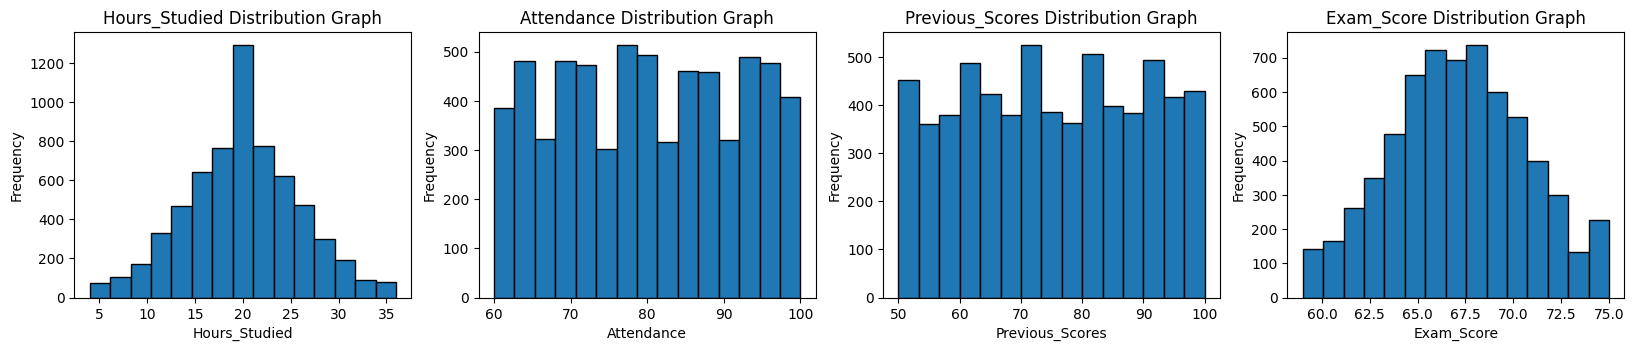

In [111]:
numCol = df.select_dtypes('number').columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numCol):
    plt.subplot(5,4, i+1)
    plt.hist(df[col], edgecolor= 'k', bins=15)
    plt.xlabel(f"{col}")
    plt.ylabel('Frequency')
    plt.title(f"{col} Distribution Graph")
plt.show()


2. KDE Plot

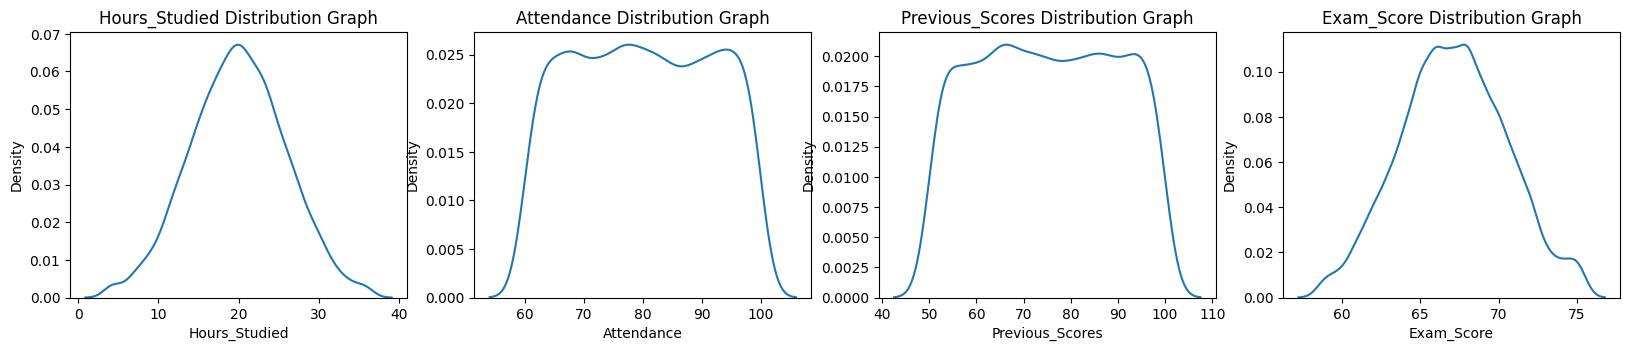

In [112]:
numCol = df.select_dtypes('number').columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numCol):
    plt.subplot(5,4, i+1)
    sns.kdeplot(df[col])
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.show()


>> Categorical Data Distribution
3. Count Plot

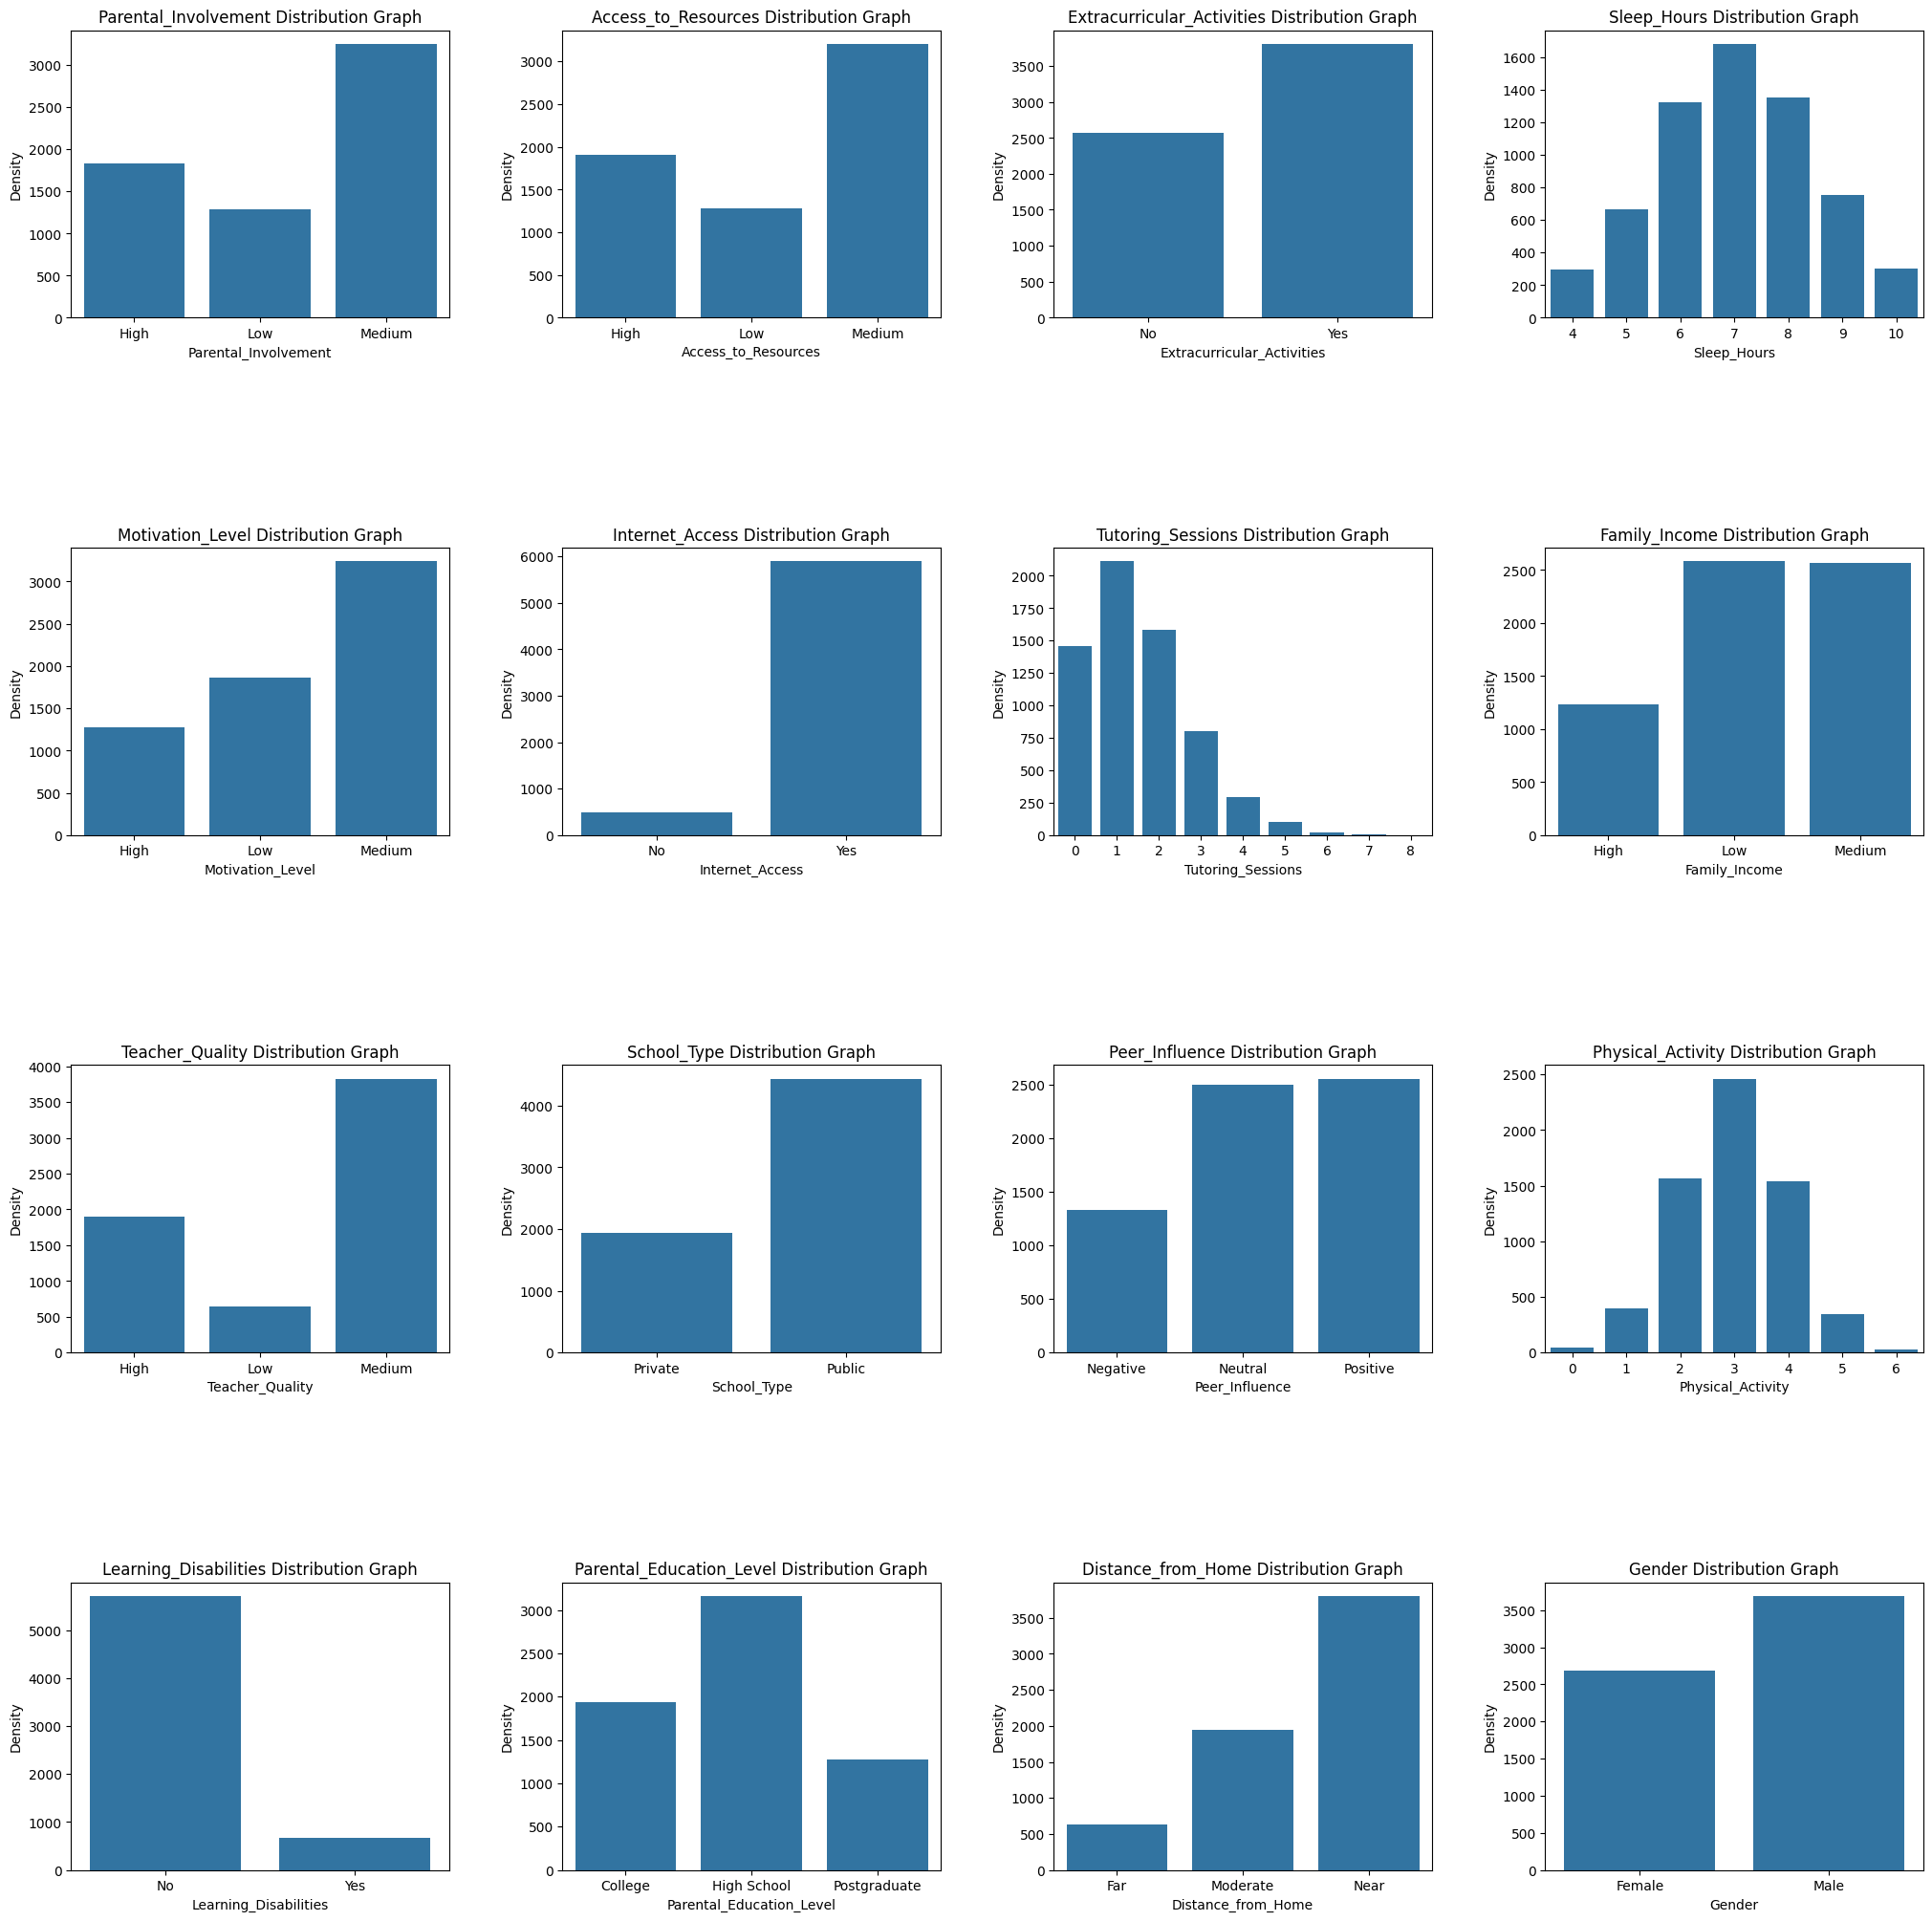

In [113]:
strCol = df.select_dtypes('category').columns
plt.figure(figsize=(25,25))
for i, col in enumerate(strCol):
    plt.subplot(4,4, i+1)
    sns.countplot(x=col, data=df)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

4. Pie Plot

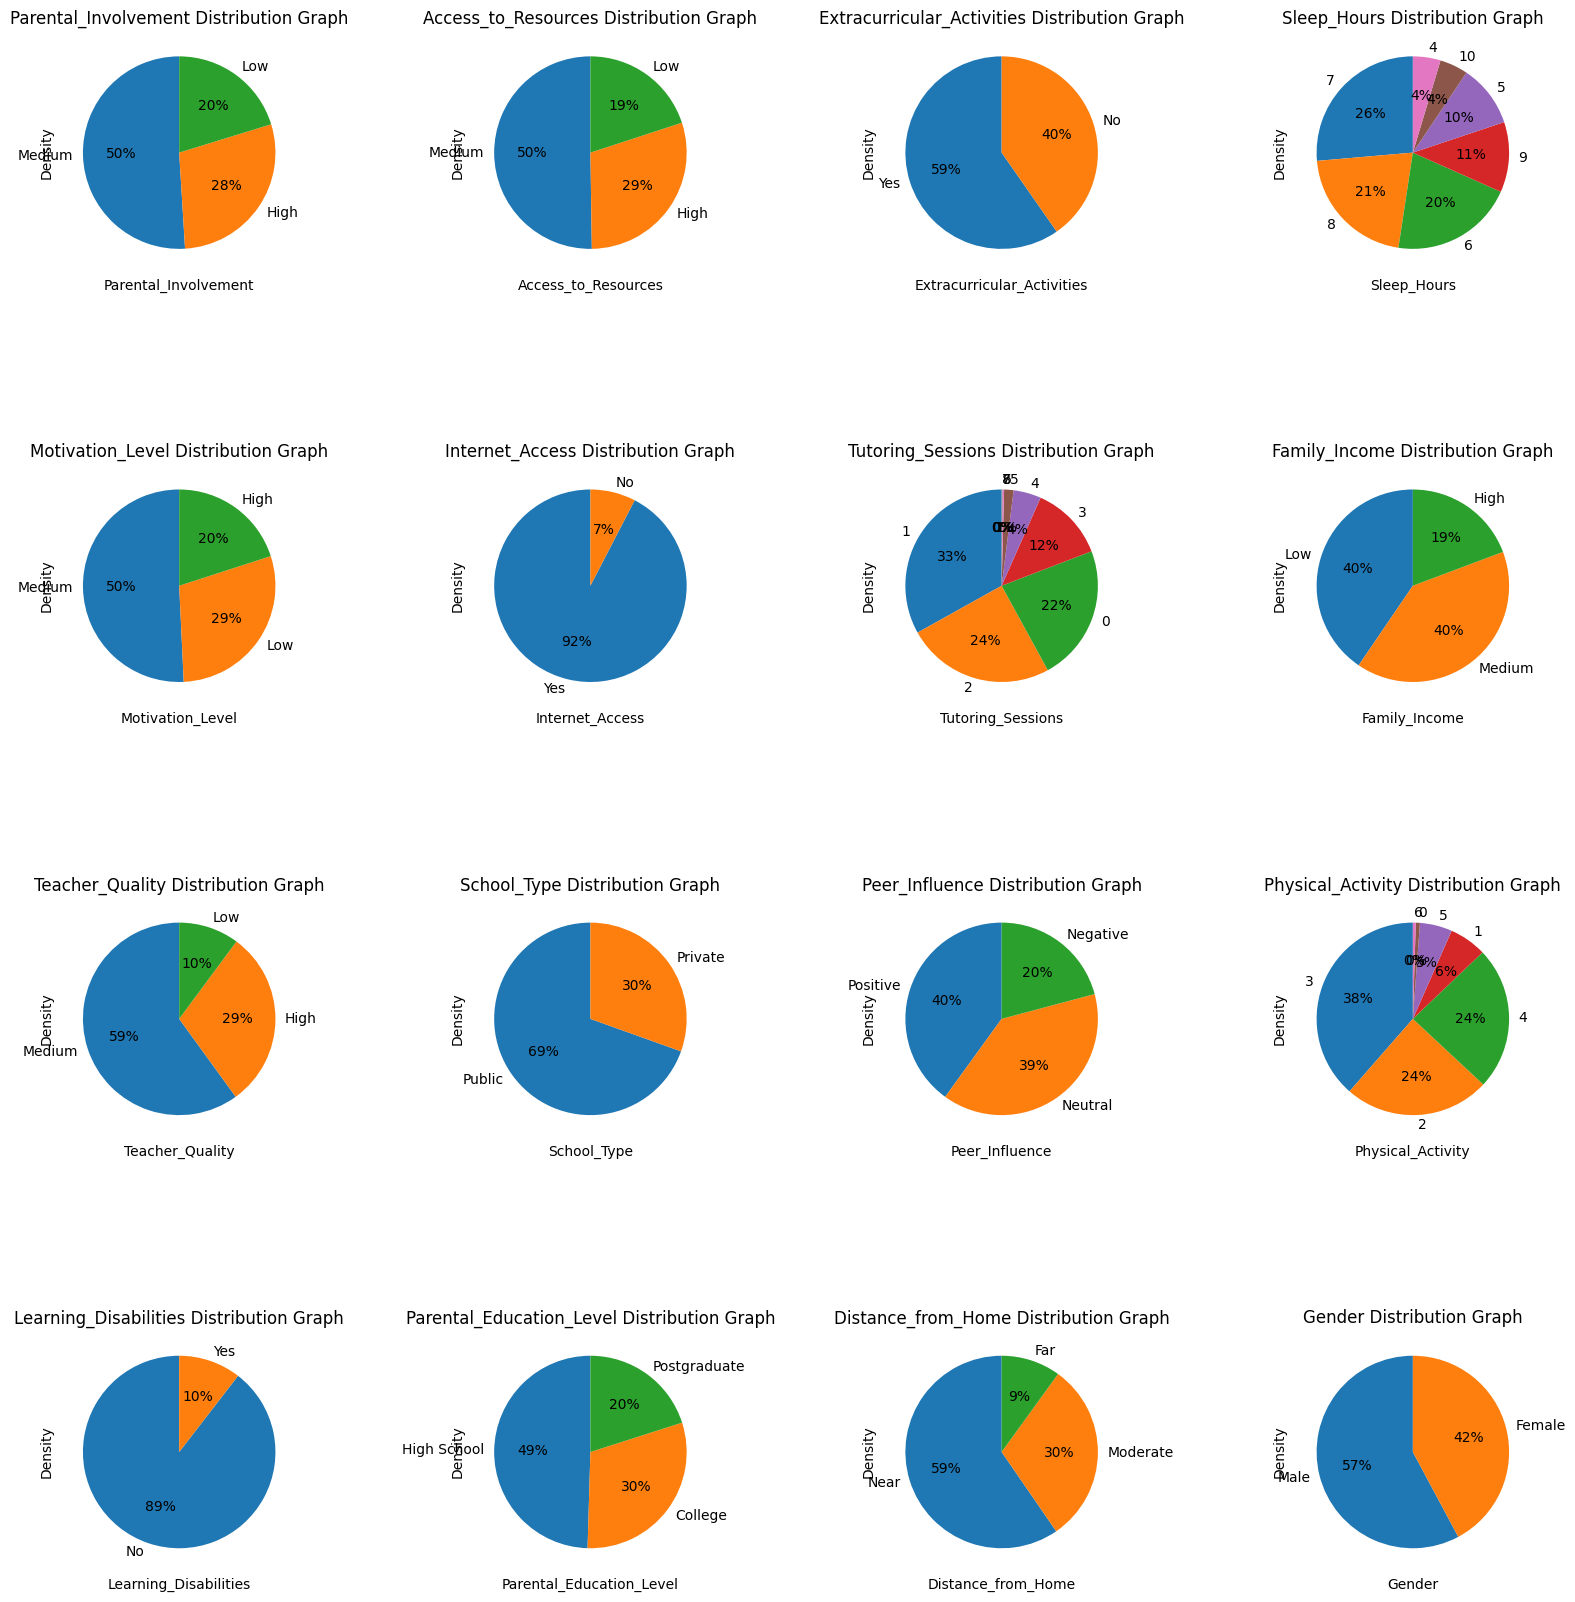

In [114]:
numCol = df.select_dtypes('category').columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numCol):
    plt.subplot(4,4, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count, labels=categories, autopct="%1.1d%%", startangle=90)
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.8, wspace=0.3)
plt.show()

# Removing Duplicates

In [115]:
df.duplicated().sum()

0

# Encoding

In [116]:
le=LabelEncoder()
df['Parental_Involvement']=le.fit_transform(df['Parental_Involvement'])
df['Access_to_Resources']=le.fit_transform(df['Access_to_Resources'])
df['Motivation_Level']=le.fit_transform(df['Motivation_Level'])
df['Family_Income']=le.fit_transform(df['Family_Income'])
df['Teacher_Quality']=le.fit_transform(df['Teacher_Quality'])
df['Distance_from_Home']=le.fit_transform(df['Distance_from_Home'])

In [117]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,No,7,73,1,Yes,0,1,2,Public,Positive,3,No,High School,2,Male,67
1,19,64,1,2,No,8,59,1,Yes,2,2,2,Public,Negative,4,No,College,1,Female,61
2,24,98,2,2,Yes,7,91,2,Yes,2,2,2,Public,Neutral,4,No,Postgraduate,2,Male,74
3,29,89,1,2,Yes,8,98,2,Yes,1,2,2,Public,Negative,4,No,High School,1,Male,71
4,19,92,2,2,Yes,6,65,2,Yes,3,2,0,Public,Neutral,4,No,College,2,Female,70


In [118]:
from category_encoders import OneHotEncoder

# Select categorical columns you want to encode
catCol = [
    'Extracurricular_Activities', 
    'Internet_Access',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Gender'
]

# Initialize OneHotEncoder from category_encoders
encoder = OneHotEncoder(cols=catCol, drop_invariant=True, use_cat_names=True)

# Fit and transform the dataframe
df = encoder.fit_transform(df)

df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access_Yes,...,Physical_Activity,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_College,Parental_Education_Level_Postgraduate,Distance_from_Home,Gender_Male,Gender_Female,Exam_Score
0,23,84,1,0,1,0,7,73,1,1,...,3,1,0,1,0,0,2,1,0,67
1,19,64,1,2,1,0,8,59,1,1,...,4,1,0,0,1,0,1,0,1,61
2,24,98,2,2,0,1,7,91,2,1,...,4,1,0,0,0,1,2,1,0,74
3,29,89,1,2,0,1,8,98,2,1,...,4,1,0,1,0,0,1,1,0,71
4,19,92,2,2,0,1,6,65,2,1,...,4,1,0,0,1,0,2,0,1,70


In [119]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access_Yes,...,Physical_Activity,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_College,Parental_Education_Level_Postgraduate,Distance_from_Home,Gender_Male,Gender_Female,Exam_Score
0,23,84,1,0,1,0,7,73,1,1,...,3,1,0,1,0,0,2,1,0,67
1,19,64,1,2,1,0,8,59,1,1,...,4,1,0,0,1,0,1,0,1,61
2,24,98,2,2,0,1,7,91,2,1,...,4,1,0,0,0,1,2,1,0,74
3,29,89,1,2,0,1,8,98,2,1,...,4,1,0,1,0,0,1,1,0,71
4,19,92,2,2,0,1,6,65,2,1,...,4,1,0,0,1,0,2,0,1,70


# Normalization

In [120]:
from sklearn.preprocessing import MinMaxScaler
numCol = df.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(df[numCol])
df[numCol] = scaler.transform(df[numCol])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access_Yes,...,Physical_Activity,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_College,Parental_Education_Level_Postgraduate,Distance_from_Home,Gender_Male,Gender_Female,Exam_Score
0,0.59375,0.600,0.5,0.0,1.0,0.0,7,0.46,0.5,1.0,...,3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5000
1,0.46875,0.100,0.5,1.0,1.0,0.0,8,0.18,0.5,1.0,...,4,1.0,0.0,0.0,1.0,0.0,0.5,0.0,1.0,0.1250
2,0.62500,0.950,1.0,1.0,0.0,1.0,7,0.82,1.0,1.0,...,4,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.9375
3,0.78125,0.725,0.5,1.0,0.0,1.0,8,0.96,1.0,1.0,...,4,1.0,0.0,1.0,0.0,0.0,0.5,1.0,0.0,0.7500
4,0.46875,0.800,1.0,1.0,0.0,1.0,6,0.30,1.0,1.0,...,4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.6875


# Splitting Data

In [121]:
x=df.drop(columns=['Exam_Score'])
y=df['Exam_Score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# >>Regression

In [122]:
print(x_train.dtypes)
print(y_train.dtypes)

Hours_Studied                             float64
Attendance                                float64
Parental_Involvement                      float64
Access_to_Resources                       float64
Extracurricular_Activities_No             float64
Extracurricular_Activities_Yes            float64
Sleep_Hours                              category
Previous_Scores                           float64
Motivation_Level                          float64
Internet_Access_Yes                       float64
Internet_Access_No                        float64
Tutoring_Sessions                        category
Family_Income                             float64
Teacher_Quality                           float64
School_Type_Public                        float64
School_Type_Private                       float64
Peer_Influence_Positive                   float64
Peer_Influence_Negative                   float64
Peer_Influence_Neutral                    float64
Physical_Activity                        category


# Linear Regression

In [123]:
# Training a Linear Regression model on the scaled training data
lr=LinearRegression()
lr.fit(x_train,y_train)

# Making predictions on the test set using the trained Linear Regression model
y_pred=lr.predict(x_test)

# Calculating and printing the mean squared error (MSE) and R² scores for training and test sets
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("train_score: ",lr.score(x_train,y_train))
print("test_score: ",lr.score(x_test,y_test))

mean_squared_error:  0.00655801724195734
train_score:  0.8451368570265746
test_score:  0.8563566626756306


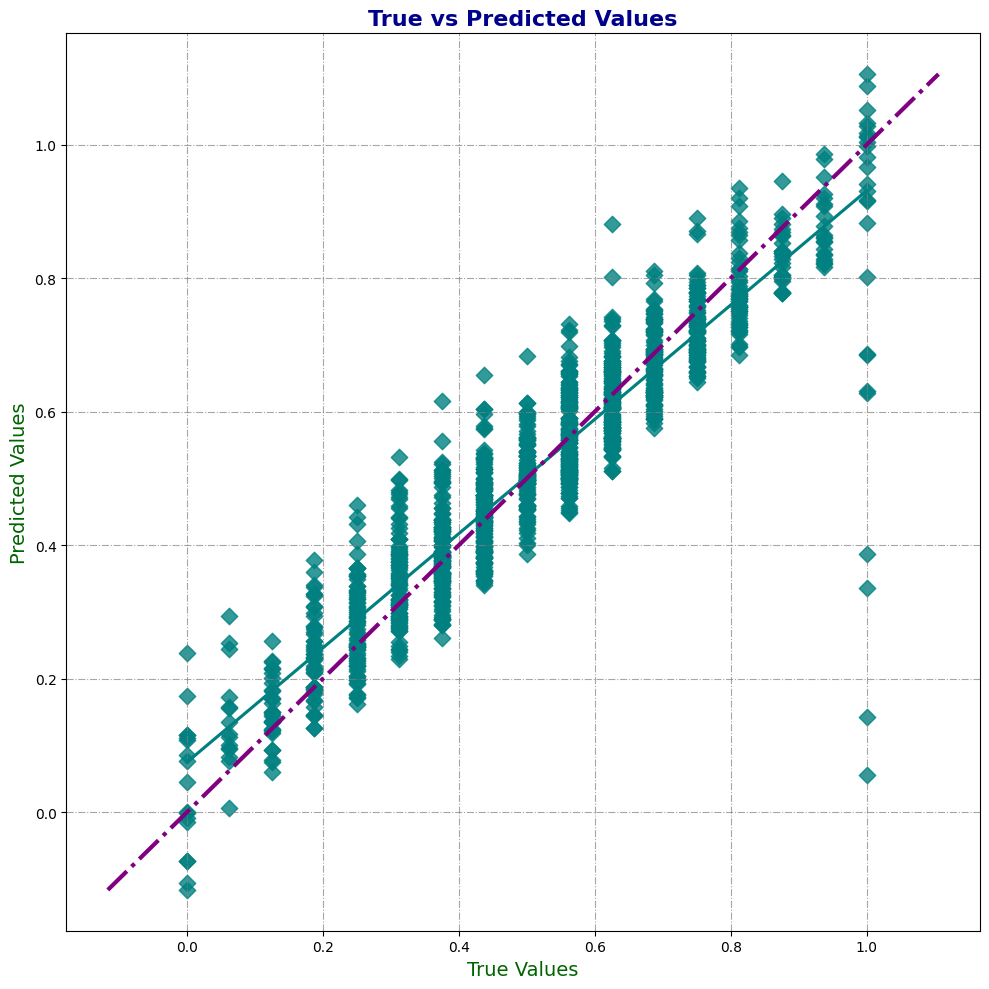

In [127]:
# Plotting the comparison between True vs Predicted values using a scatter plot and regression line
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred, ci=None, color='teal', marker='D', scatter_kws={'s':70, 'alpha':0.8})

# Plotting reference line for perfect prediction
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='purple', linestyle='-.', lw=3)

# Setting plot titles and labels
plt.title('True vs Predicted Values', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('True Values', fontsize=14, color='darkgreen')
plt.ylabel('Predicted Values', fontsize=14, color='darkgreen')

# Adding grid and adjusting layout
plt.grid(True, linestyle='-.', alpha=0.7, color='grey')

plt.tight_layout()
plt.show()

In [125]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix




# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)


# Making predictions
y_pred = model.predict(x_test)
realVsPredict = pd.DataFrame({'real': y_test, 'predicted': np.round(y_pred)})
realVsPredict.corr()


# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
realVsPredict.corr()


Mean Squared Error: 0.00655801724195734
Mean Absolute Error: 0.055236435354820076
R² Score: 0.8563566626756306


,real,predicted
real,1.000000,0.762693
predicted,0.762693,1.000000


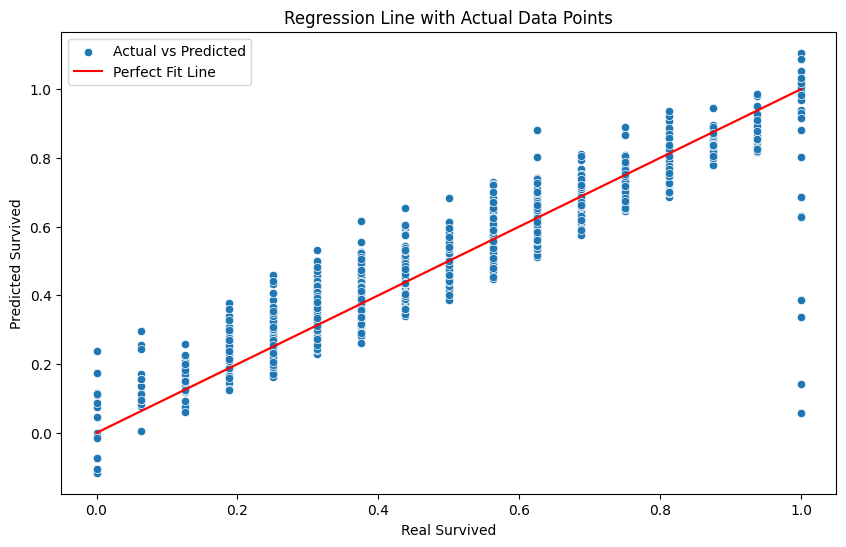

In [131]:
# Plotting the regression line with actual data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs Predicted')
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Fit Line')
plt.xlabel('Real Survived')
plt.ylabel('Predicted Survived')
plt.title('Regression Line with Actual Data Points')
plt.legend()
plt.show()

# Polynomial Regression

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix

x=df.drop(columns=['Exam_Score'])
y=df['Exam_Score']

# Creating polynomial features 
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=20)



# Creating and training the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)


# Making predictions
y_pred = model.predict(X_test)
Real_VS_Predict = pd.DataFrame({'real': y_test, 'predicted': np.round(y_pred)})

# Evaluation Metrics
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

# Result
print("Mean Squared Error:", MSE)
print("Mean Absolute Error:", MAE)
print("R² Score:", R2)
Real_VS_Predict.corr()

Mean Squared Error: 0.0037470541499846355
Mean Absolute Error: 0.02438524701752259
R² Score: 0.9149628749601675


,real,predicted
real,1.00000,0.77701
predicted,0.77701,1.00000
